### Importing neceassary Libraries and dataset

In [ ]:
!pip install wordcloud
!pip install matplotlib

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

!nvidia-smi

/kaggle/input/elonmusk-2019-tweets/2019.csv
/kaggle/input/elon-musk-tweets-2010-2021/2011.csv
/kaggle/input/elon-musk-tweets-2010-2021/2013.csv
/kaggle/input/elon-musk-tweets-2010-2021/2015.csv
/kaggle/input/elon-musk-tweets-2010-2021/2014.csv
/kaggle/input/elon-musk-tweets-2010-2021/2021.csv
/kaggle/input/elon-musk-tweets-2010-2021/2017.csv
/kaggle/input/elon-musk-tweets-2010-2021/2019.csv
/kaggle/input/elon-musk-tweets-2010-2021/2020.csv
/kaggle/input/elon-musk-tweets-2010-2021/2012.csv
/kaggle/input/elon-musk-tweets-2010-2021/2010.csv
/kaggle/input/elon-musk-tweets-2010-2021/2018.csv
/kaggle/input/elon-musk-tweets-2010-2021/2022.csv
/kaggle/input/elon-musk-tweets-2010-2021/2016.csv
Wed Nov 29 09:06:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| 

In [ ]:
# Assuming the dataset is in the '/kaggle/input/' directory
file_path1 = '/kaggle/input/elon-musk-tweets-2010-2021/2010.csv'
file_path2 = '/kaggle/input/elon-musk-tweets-2010-2021/2011.csv'
file_path3 = '/kaggle/input/elon-musk-tweets-2010-2021/2012.csv'
file_path4 = '/kaggle/input/elon-musk-tweets-2010-2021/2013.csv'
file_path5 = '/kaggle/input/elon-musk-tweets-2010-2021/2014.csv'
file_path6 = '/kaggle/input/elon-musk-tweets-2010-2021/2015.csv'
file_path7 = '/kaggle/input/elon-musk-tweets-2010-2021/2016.csv'
file_path8 = '/kaggle/input/elon-musk-tweets-2010-2021/2017.csv'
file_path9 = '/kaggle/input/elon-musk-tweets-2010-2021/2018.csv'
file_path10 = '/kaggle/input/elon-musk-tweets-2010-2021/2019.csv'
file_path11 = '/kaggle/input/elon-musk-tweets-2010-2021/2020.csv'
file_path12 = '/kaggle/input/elon-musk-tweets-2010-2021/2021.csv'
file_path13 = '/kaggle/input/elon-musk-tweets-2010-2021/2022.csv'

In [ ]:
tweet1 = pd.read_csv(file_path1)
tweet2 = pd.read_csv(file_path2)
tweet3 = pd.read_csv(file_path3)
tweet4 = pd.read_csv(file_path4)
tweet5 = pd.read_csv(file_path5)
tweet6 = pd.read_csv(file_path6)
tweet7 = pd.read_csv(file_path7)
tweet8 = pd.read_csv(file_path8)
tweet9 = pd.read_csv(file_path9)
tweet10 = pd.read_csv(file_path10)
tweet11 = pd.read_csv(file_path11)
tweet12 = pd.read_csv(file_path12)
tweet13 = pd.read_csv(file_path13)

In [ ]:
tweet7.head()

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,812800512743514113,812463378270588928,1.482622e+12,2016-12-24 23:21:57,0,NaN,Deus ex machina on the center screen when it ends,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1,812751450522562560,812707149252034560,1.482610e+12,2016-12-24 20:07:00,0,NaN,@quipme Occasional existential dread is inevit...,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'quipme', 'name': 'Vladimír Z...",NaN,NaN,NaN,NaN
2,2,812709917823934464,812703873035108352,1.482600e+12,2016-12-24 17:21:58,0,NaN,"@djsearle @FredericLambert Yes, grid won't be ...",en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'djsearle', 'name': 'Damon Se...",NaN,NaN,NaN,NaN
3,3,812708946225963008,812703873035108352,1.482600e+12,2016-12-24 17:18:06,0,NaN,@FredericLambert A mere 350 kW ... what are yo...,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'FredericLambert', 'name': 'F...",NaN,NaN,NaN,NaN
4,4,812708330304978944,812707149252034560,1.482600e+12,2016-12-24 17:15:39,0,NaN,@yamenalhaddad Brain is full right now and tha...,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'yamenalhaddad', 'name': 'Yam...",NaN,NaN,NaN,NaN


In [ ]:
tweet7.shape

(2000, 39)

In [ ]:
# Here we will concat all the tweets of all the years into a single dataframe tweets
tweets = pd.concat([tweet1, tweet2, tweet3, tweet4, tweet5, tweet6, tweet7, tweet8, tweet9, tweet10, tweet11, tweet12, tweet13], ignore_index=True)

In [ ]:
tweets.head()

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,reply_to,retweet_date,translate,trans_src,trans_dest,time,mentions,replies_count,retweets_count,likes_count
0,0.0,15434727182,15434727182,1275676317000.0,2010-06-04 18:31:57,0,NaN,"Please ignore prior tweets, as that was someon...",en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,152153637639028736,152151847614943233,1325111228000.0,2011-12-28 22:27:08,0,NaN,@TheOnion So true :),en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,151809315026636800,151809315026636800,1325029135000.0,2011-12-27 23:38:55,0,NaN,If you ever wanted to know the *real* truth ab...,en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,151338939389706242,151338939389706242,1324916990000.0,2011-12-26 16:29:50,0,NaN,Walked around a neighborhood recently rebuilt ...,en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,151337237429239808,151337237429239808,1324916584000.0,2011-12-26 16:23:04,0,NaN,"It was Xmas, so we brought presents for the ki...",en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
tweets.columns

Index(['Unnamed: 0', 'id', 'conversation_id', 'created_at', 'date', 'timezone',
       'place', 'tweet', 'language', 'hashtags', 'cashtags', 'user_id',
       'user_id_str', 'username', 'name', 'day', 'hour', 'link', 'urls',
       'photos', 'video', 'thumbnail', 'retweet', 'nlikes', 'nreplies',
       'nretweets', 'quote_url', 'search', 'near', 'geo', 'source',
       'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date',
       'translate', 'trans_src', 'trans_dest', 'time', 'mentions',
       'replies_count', 'retweets_count', 'likes_count'],
      dtype='object')

Majority of features are useless for use, thus we will just remove them, and will keep just 'tweet' and 'id' feature.

In [ ]:
tweets = tweets[['id', 'tweet']]

In [ ]:
tweets.iloc[3]['tweet']

'Walked around a neighborhood recently rebuilt with help from APJ and others  http://t.co/KYHjsS1k'

### Preprocessing

In [ ]:
# Use regular expression to remove all the tagged user accounts as they donot contribute to the text
import re

def clean_tweet(tweet):
    # Remove mentions
    mention_pattern = r'@\w+'
    cleaned_tweet = re.sub(mention_pattern, '', tweet)

    # Remove extra spaces
    cleaned_tweet = ' '.join(cleaned_tweet.split())

    # Remove hyperlinks
    hyperlink_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    cleaned_tweet = re.sub(hyperlink_pattern, '', cleaned_tweet)

    return cleaned_tweet

In [ ]:
tweets.isnull().sum()

id       0
tweet    0
dtype: int64

In [ ]:
tweets.reset_index(inplace = True,drop = True)

In [ ]:
tweets.shape

(34878, 2)

In [ ]:
tweets['tweet'] = tweets['tweet'].apply(clean_tweet)

In [ ]:
tweets.head()

,id,tweet
0,15434727182,"Please ignore prior tweets, as that was someon..."
1,152153637639028736,So true :)
2,151809315026636800,If you ever wanted to know the *real* truth ab...
3,151338939389706242,Walked around a neighborhood recently rebuilt ...
4,151337237429239808,"It was Xmas, so we brought presents for the ki..."


In [ ]:
tweets = tweets.loc[tweets.tweet.str.split(' ').str.len() > 10]

In [ ]:
tweets.shape

(18033, 2)



*   Musk often tags a lot of people in his tweets and also gives links of other sites, hence it is important to remove them.
*   If there are less words in tweet, the finetuned model will not work as expected and might generate small meaning less sentences.



### Basic Visualization

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
text = tweets['tweet'].str.cat(sep = ' ')

In [ ]:
print(text[0:100])

Please ignore prior tweets, as that was someone pretending to be me :) This is actually me. If you e


In [ ]:
stopwords = set(STOPWORDS)

In [ ]:
new_words = ['will', 'now', 'much', 'still', 'actually']
stopwords = stopwords.union(new_words)

In [ ]:
for stopword in stopwords:
    print(stopword)

no
you
otherwise
they're
he'd
up
her
we
than
during
they'll
until
wasn't
they
http
she'd
you'd
their
was
under
actually
she
we'll
have
your
when
before
she's
for
been
hadn't
i've
couldn't
myself
down
not
so
if
mustn't
against
him
when's
can
on
how's
r
else
what's
shouldn't
its
again
themselves
our
i
she'll
had
why's
are
didn't
i'm
here
i'll
by
would
yours
that's
once
over
be
between
cannot
most
being
an
into
me
therefore
he's
then
that
we've
some
itself
hasn't
k
those
isn't
my
how
with
won't
at
because
to
while
doing
whom
i'd
ours
there
nor
should
too
as
get
who's
which
he
could
does
each
however
about
ever
above
any
such
don't
having
ought
is
yourselves
did
has
weren't
there's
am
since
further
after
other
it's
ourselves
you'll
but
they'd
from
same
off
a
himself
herself
both
who
yourself
out
shall
the
will
haven't
only
we'd
own
now
much
also
like
why
few
shan't
still
more
very
hers
what
wouldn't
doesn't
and
can't
you've
these
through
we're
below
www
do
hence
theirs
this
in
all
they've


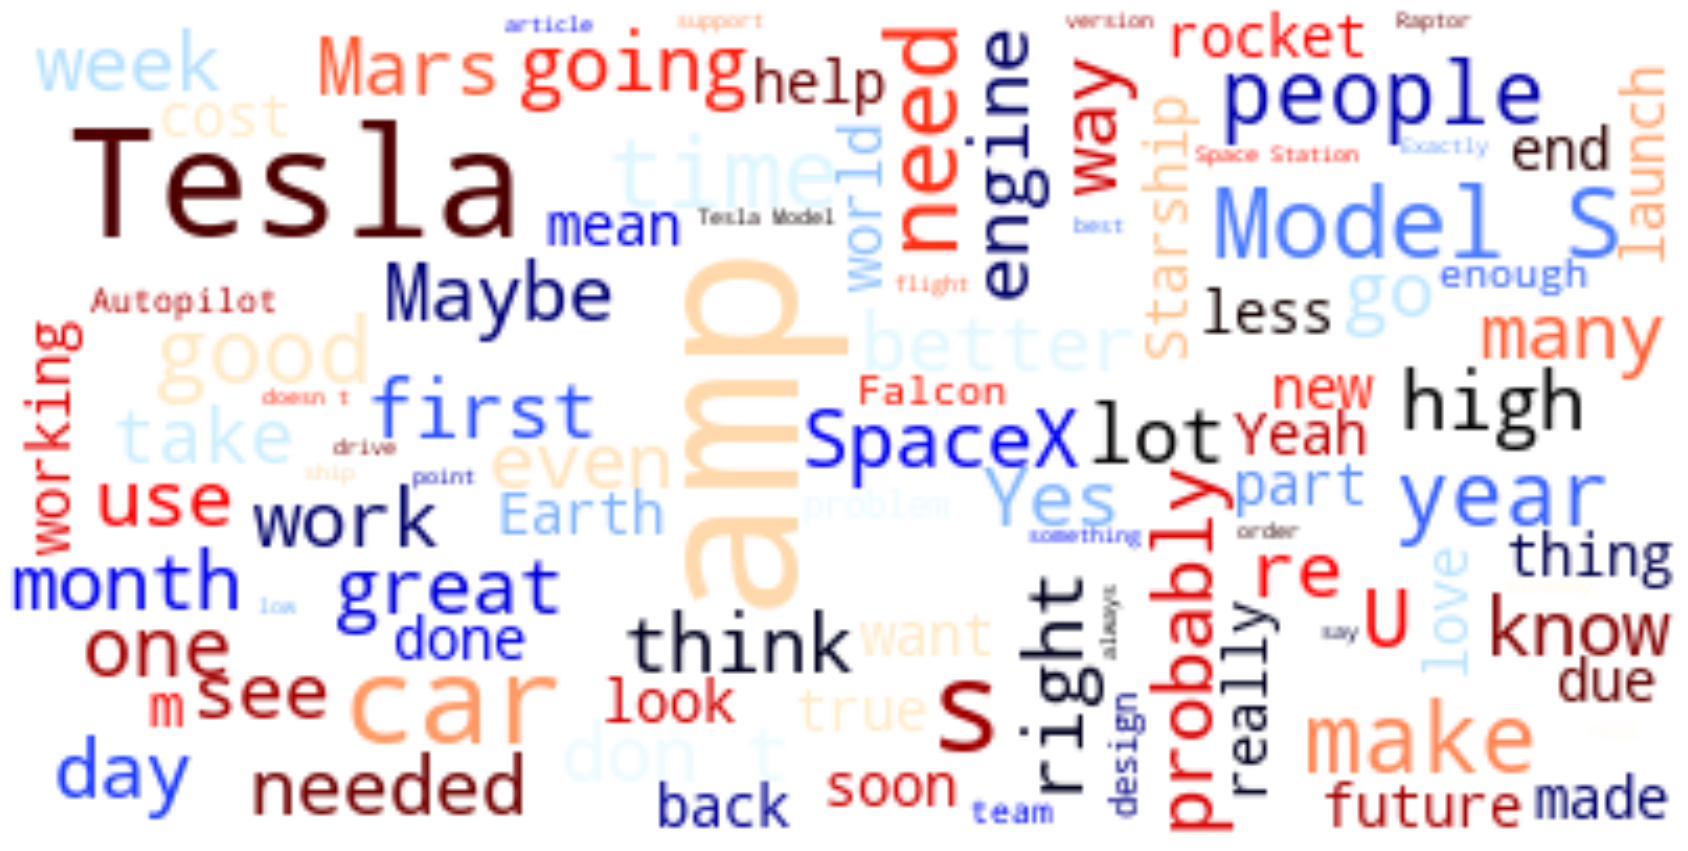

In [ ]:
#Size of Word Cloud
plt.rcParams["figure.figsize"] = (30,30)

#Make Wordcloud
wordcloud = WordCloud(max_font_size=50, max_words = 100, background_color = "white",
                     stopwords = stopwords, colormap = 'flag').generate(text)

#Plot the wordcloud
plt.plot()
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

### Model Building and Fine-Tuning

In [ ]:
! pip install aitextgen -q

In [ ]:
tweets.to_csv("input_text_cleaned.txt", columns=["tweet"], header=False, index=False)

In [ ]:
from aitextgen.TokenDataset import TokenDataset

In [ ]:
data = TokenDataset('./input_text_cleaned.txt', line_by_line=True)
#data has been converted into 1024 sized torch tensors.

  0%|          | 0/18033 [00:00<?, ?it/s]

In [ ]:
type(data)

aitextgen.TokenDataset.TokenDataset

In [ ]:
# data.__len__()

529820

In [ ]:
from aitextgen import aitextgen

In [ ]:
# Choose Model to finetune
ai = aitextgen(tf_gpt2="124M",  to_gpu=True)

Fetching checkpoint:   0%|          | 0.00/77.0 [00:00<?, ?it/s]

Fetching hparams.json:   0%|          | 0.00/90.0 [00:00<?, ?it/s]

Fetching model.ckpt.data-00000-of-00001:   0%|          | 0.00/498M [00:00<?, ?it/s]

Fetching model.ckpt.index:   0%|          | 0.00/5.21k [00:00<?, ?it/s]

Fetching model.ckpt.meta:   0%|          | 0.00/471k [00:00<?, ?it/s]

Converting TensorFlow checkpoint from /kaggle/working/aitextgen/124M
Loading TF weight model/h0/attn/c_attn/b with shape [2304]
Loading TF weight model/h0/attn/c_attn/w with shape [1, 768, 2304]
Loading TF weight model/h0/attn/c_proj/b with shape [768]
Loading TF weight model/h0/attn/c_proj/w with shape [1, 768, 768]
Loading TF weight model/h0/ln_1/b with shape [768]
Loading TF weight model/h0/ln_1/g with shape [768]
Loading TF weight model/h0/ln_2/b with shape [768]
Loading TF weight model/h0/ln_2/g with shape [768]
Loading TF weight model/h0/mlp/c_fc/b with shape [3072]
Loading TF weight model/h0/mlp/c_fc/w with shape [1, 768, 3072]
Loading TF weight model/h0/mlp/c_proj/b with shape [768]
Loading TF weight model/h0/mlp/c_proj/w with shape [1, 3072, 768]
Loading TF weight model/h1/attn/c_attn/b with shape [2304]
Loading TF weight model/h1/attn/c_attn/w with shape [1, 768, 2304]
Loading TF weight model/h1/attn/c_proj/b with shape [768]
Loading TF weight model/h1/attn/c_proj/w with shap

Save PyTorch model to aitextgen/pytorch_model.bin
Save configuration file to aitextgen/config.json


In [ ]:
# we try the performance of model without finetuning
general_gpt = aitextgen(tf_gpt2="124M",  to_gpu=True)
general_gpt.save()

In [ ]:
ai.train('input_text_cleaned.txt',
         line_by_line=True,
         from_cache=False,
         num_steps=500,
         generate_every=100,
         save_every=500,
         save_gdrive=False,
         learning_rate=1e-3,
         fp16=False,
         batch_size=1,
         )

  0%|          | 0/18033 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:448: LightningDeprecationWarning: Setting `Trainer(gpus=-1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=-1)` instead.
  f"Setting `Trainer(gpus={gpus!r})` is deprecated in v1.7 and will be removed"


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

/opt/conda/lib/python3.7/site-packages/pytorch_lightning/trainer/configuration_validator.py:259: LightningDeprecationWarning: The `Callback.on_batch_end` hook was deprecated in v1.6 and will be removed in v1.8. Please use `Callback.on_train_batch_end` instead.
  f"The `Callback.{hook}` hook was deprecated in v1.6 and"


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/500 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [ ]:
ai.save()

In [ ]:
prompt_ai = aitextgen(model_folder = '.', to_gpu=True)

### Testing finetuned MuskGPT and normal GPT2 Model.

In [ ]:
print(prompt_ai.generate(prompt = "All design"))

All design and engineering of Model 3 is done, incl cross-country trip next week."

None


In [ ]:
print(prompt_ai.generate(prompt = "SpaceX will"))

SpaceX will launch The Boring Company China on Sunday night with help from APJ and others 

None


In [ ]:
# Elon Musk
print(prompt_ai.generate(prompt = "Earth and Humans should "))

Earth and Humans should  via"Good point. We are essentially a steward of life &amp; duty-bound imo to ensure its good future for all."

None


In [ ]:
# GPT2
print(general_gpt.generate(prompt = "Earth and Humans should "))

Earth and Humans should  be treated differently.  
In order to be fair and to reflect the differences between humans and animals, we must also consider how those differences in behavior can be addressed in a more nuanced and realistic manner.
The problem with the "humanist" paradigm is that it has the potential to result in a new paradigm that is not based on a realistic, realistic understanding of the human condition.
It is important to remember that the human condition is the product of many factors, which can have a profound impact on the development of our species. This includes, but is not limited to:
We live in a globalized society. We live in environments where human beings are highly valued and are used to a wide variety of things. We live in a world where the most important and most important things to do are social, political, and economic. We live in a world where economic, social, and political power resides in our governments and corporations. We live in a world where we a

In [ ]:
print(prompt_ai.generate(prompt = "Tesla will "))

Tesla will  via The Boring Company China on Sunday night with the view-based kids and Talulah. I don't wish to stop Tesla. Just won't unseat Google from 1st place with Larry P in charge.

None


In [ ]:
print(general_gpt.generate(prompt = "Tesla will "))

Tesla will  provide a range of about 500 miles. This is a very fast moving aircraft. The first thing that you notice is the light weight and the size of the aircraft. The engine is 2.6 liters. The engine is a 2/4" cylinder with a 2.5 litre boost. In the first model, the engine was a 2.5 litre turbo engine and the first version of the engine was a 4.1 litre turbo with a 2.5 litre boost. In the second model, the engine was a 3.0 litre turbo with a 2.5 litre boost. The engine is a 4.5 litre turbo with a 2.5 litre boost. The second version of the engine was a 5.4 litre turbo with a 2.5 litre boost. The engine is a 6.0 litre turbo with a 2.5 litre boost. The engine is a 7.0 litre turbo with a 2.5 litre boost. The engine is a 8.5 litre turbo with a 2.5 litre boost. The engine is a 9 litre turbo with a 2.5 litre boost. The engine is a 10.0 litre turbo with
None


In [ ]:
# How GPT2 will write about India.
print(general_gpt.generate(prompt = "India will"))

India will be under constant pressure to make a major shift in its global strategy.

The move will force the central bank to make significant additional cuts to its balance sheet and to reduce capital requirements for its benchmark sovereign wealth fund.

It will also mean a shift away from the traditional money-laundering strategies of the past, when the central bank relied on its own central bank to handle the money.

The move comes as the US Federal Reserve looks to boost its money supply in response to the economic turmoil in China and the rise of China's central bank.

The central bank will also be looking to cut interest rates to help stimulate growth in the economy.

A separate move by US President Donald Trump's White House has also indicated that the Fed will increase its purchases of US bonds.

The move comes as the US economy is hurtling toward a record high, with most of the stock market having suffered as the US lost more than 2 per cent of its value in the last three week

In [ ]:
# What Elon Musk would have tweeted about India.
print(prompt_ai.generate(prompt = "India will"))

India will ban new sales as fast as possible as possible. I hope that China and Russia join soon. 

None


In [ ]:
# What Elon Musk would have tweeted about China.
print(prompt_ai.generate(prompt = "China already"))

China already has solar panels &amp; solar power. Even if regs change to electric vehicles later this year, it will take longer to install &amp; activate"

None


In [ ]:
# How GPT2 will write about China.
print(general_gpt.generate(prompt = "China already "))

China already  is doing well, although they still have very low growth; they are still in the middle of the pack. They continue to have low growth rates in other parts of the world, though they are still very high and growing. And they are getting richer. They are doing well. In Japan, they have been doing well for a long time and probably will be. They have the highest growth rate in the world. Japan is very good, but they are not doing well right now. So why are they so good?
Japan is a poor country. It has very poor infrastructure and it is very poor in education. Many of the young people in Japan are not educated. They are not allowed to go to school. No one is allowed to go to school. And so poor people don't go to school. They go to school for the sake of not having any money, for being poor, for being in debt, for being in poverty, for being in trouble. They are so poor that they don't have any money. And so they get into debt, they get into debt to make more money, to make more